In [2]:
import csv
import json
import pandas as pd


In [38]:
wine_pd = pd.read_csv("winemag-data_first150k.csv")
wine_pd = wine_pd[wine_pd.price.isna()==False]

In [39]:
wine_pd_withna = wine_pd.copy().fillna("others")

In [40]:
wine_pd_nona = wine_pd[wine_pd.region_2.isna()==False]

In [41]:
wine_pd_nona.shape,wine_pd_withna.shape

((60704, 11), (137235, 11))

In [42]:
wine_pd

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [43]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [44]:
wine_pd_withna_dummy = pd.get_dummies(wine_pd_withna,columns=["region_1","region_2"],drop_first=False)

In [45]:
dummy_cols = wine_pd_withna_dummy.columns[(wine_pd_withna_dummy.columns.str.startswith("region_1_"))|(wine_pd_withna_dummy.columns.str.startswith("region_2_"))]

In [71]:
wine_pd_withna_dummy = pd.get_dummies(wine_pd_withna,columns=["region_1","region_2"],drop_first=False)
dummy_cols = wine_pd_withna_dummy.columns[(wine_pd_withna_dummy.columns.str.startswith("region_1_"))|(wine_pd_withna_dummy.columns.str.startswith("region_2_"))]


X = wine_pd_withna_dummy[dummy_cols] #.to_numpy()
y = wine_pd_withna_dummy.price.to_numpy()

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=10,random_state=0)
regr_1.fit(X, y)


DecisionTreeRegressor(max_depth=10, random_state=0)

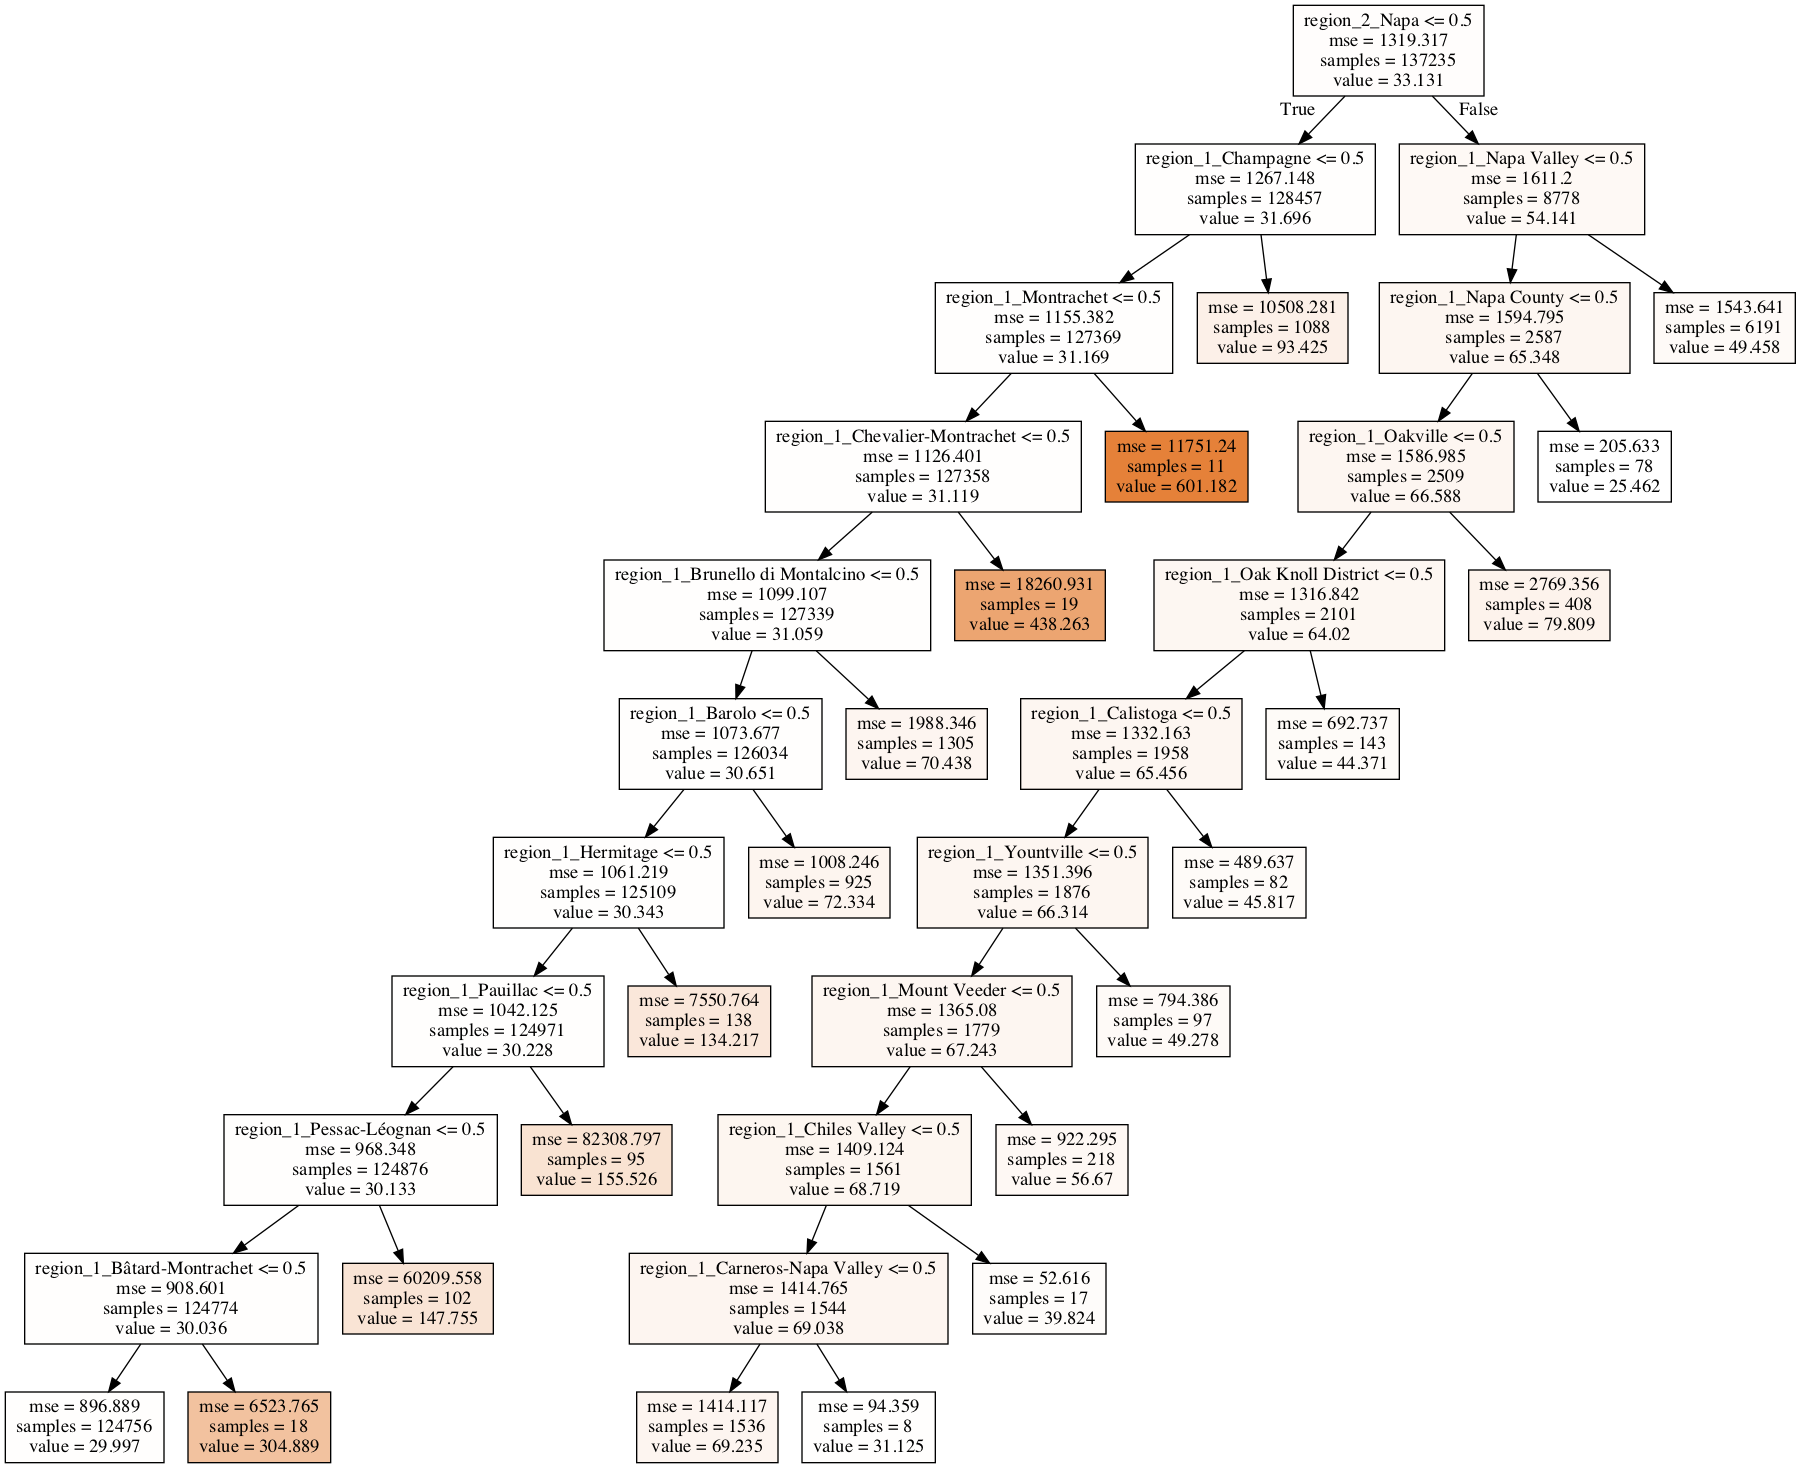

In [72]:
import pydotplus
import sklearn.tree as tree
from IPython.display import Image

dt_feature_names = dummy_cols
#dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(regr_1, out_file='tree.dot', 
    feature_names=dt_feature_names, #class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())


In [73]:
"""
from sklearn import tree
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
tree.plot_tree(regr_1)
plt.show()
"""

'\nfrom sklearn import tree\nfrom matplotlib import pyplot as plt\nplt.figure(figsize=(20,20))\ntree.plot_tree(regr_1)\nplt.show()\n'

In [59]:
wine_pd_nona_dummy = pd.get_dummies(wine_pd_nona,columns=["region_1","region_2"],drop_first=False)
dummy_cols = wine_pd_nona_dummy.columns[(wine_pd_nona_dummy.columns.str.startswith("region_1_"))|(wine_pd_nona_dummy.columns.str.startswith("region_2_"))]

In [62]:
X = wine_pd_nona_dummy[dummy_cols] #.to_numpy()
y = wine_pd_nona_dummy.price.to_numpy()

# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=10,random_state=0)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [74]:
"""
from sklearn import tree
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
tree.plot_tree(regr_2)
plt.show()
"""

'\nfrom sklearn import tree\nfrom matplotlib import pyplot as plt\nplt.figure(figsize=(20,20))\ntree.plot_tree(regr_2)\nplt.show()\n'

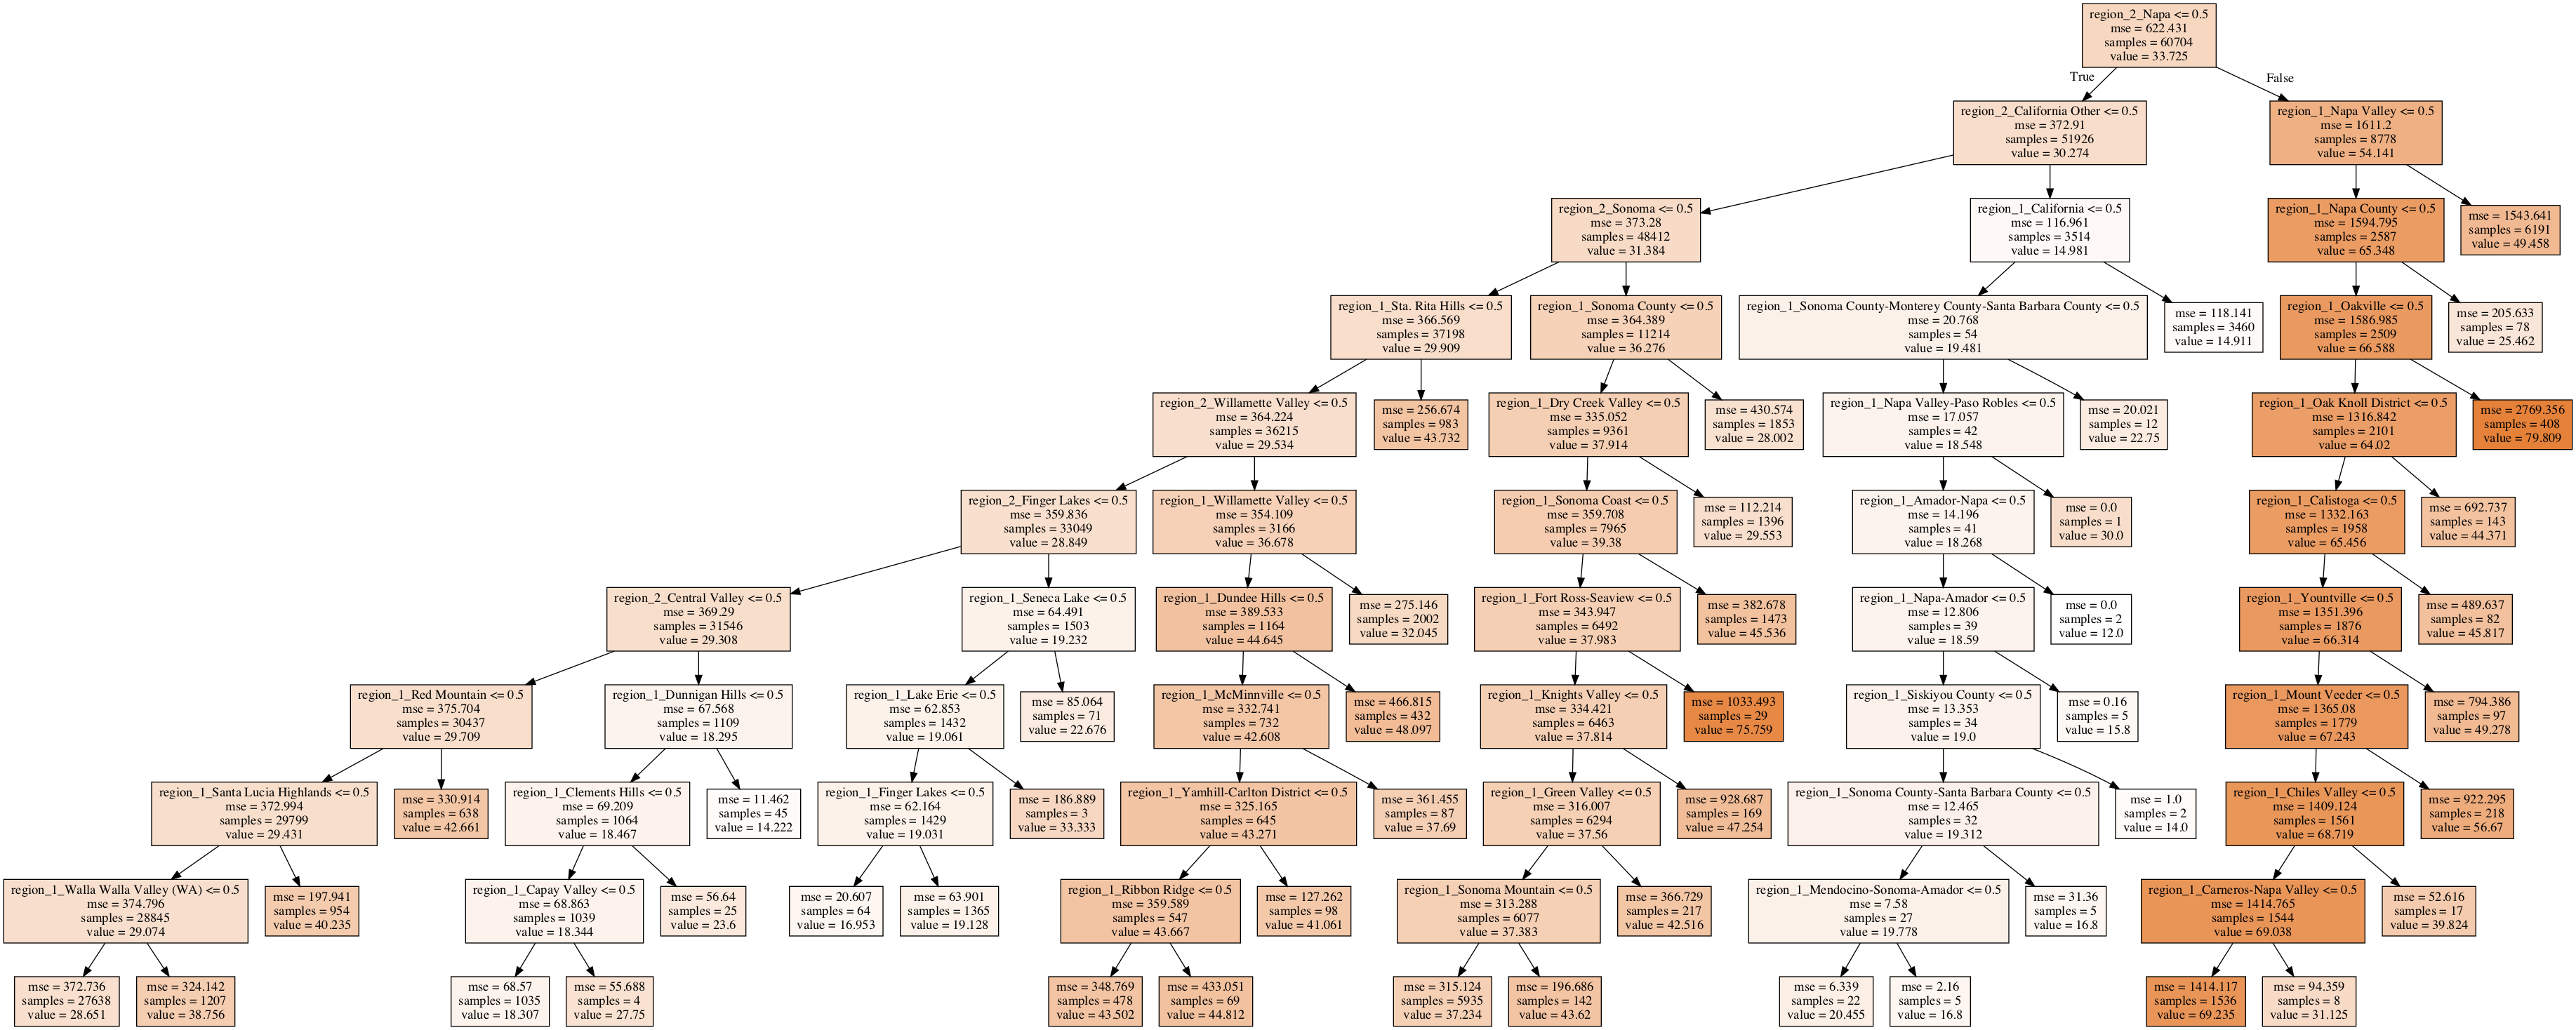

In [70]:
import pydotplus
import sklearn.tree as tree
from IPython.display import Image

dt_feature_names = dummy_cols
#dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(regr_2, out_file='tree.dot', 
    feature_names=dt_feature_names, #class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())
